## 問題統整

1. SAR (Suspicious Activity Report) 的比例不均
    * 洗錢 (sar = 1) 有 234 筆資料
    * 正常 (sar = 0) 有 23672 筆資料

2. ccba 中為月資料，其他為日資料，如何轉換?

### Load Data & Explanation

In [128]:
import numpy as np
import pandas as pd

ccba_df = pd.read_csv("./public_train_x_ccba_full_hashed.csv")
cdtx_df = pd.read_csv("./public_train_x_cdtx0001_full_hashed.csv")
custinfo_df = pd.read_csv("./public_train_x_custinfo_full_hashed.csv")
dp_df = pd.read_csv("./public_train_x_dp_full_hashed.csv")
remit_df = pd.read_csv("./public_train_x_remit1_full_hashed.csv")


alert_time_0_364_df = pd.read_csv("./train_x_alert_date.csv")
alert_time_365_393_df = pd.read_csv("./public_x_alert_date.csv")
alert_time_df = pd.concat([alert_time_0_364_df, alert_time_365_393_df], axis=0)
alert_sar_df = pd.read_csv("./train_y_answer.csv")

In [130]:
alert_sar_df

,alert_key,sar_flag
0,171189,0
1,171202,0
2,171599,0
3,171737,0
4,171142,0
...,...,...
23901,352132,0
23902,352125,0
23903,352080,0
23904,352075,0


In [129]:
custinfo_df

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5
...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4


In [133]:
train_x = pd.DataFrame()
for num in alert_sar_df["alert_key"]:
    for num1 in range(25751):
        if (num == custinfo_df["alert_key"][num1]):
            train_x =train_x.append(custinfo_df.iloc[num1,:])
train_x

KeyboardInterrupt: 

In [ ]:
test_x = pd.DataFrame()
for num in alert_sar_df["alert_key"]:
    for num1 in range(25751):
        if (num == custinfo_df["alert_key"][num1]):
            test_x =test_x.append(custinfo_df.iloc[num1,:])
train_x

In [137]:
predict_ans = pd.read_csv("./預測的案件名單及提交檔案範例.csv")
predict_ans

,alert_key,probability
0,357307,0.000017
1,376329,0.000324
2,373644,0.000372
3,357668,0.000489
4,354443,0.000526
...,...,...
3845,364485,0.997702
3846,363155,0.998987
3847,368710,0.999694
3848,358067,0.999821


In [142]:
print(352249 in custinfo_df["alert_key"])

False


In [163]:
test_x = custinfo_df.merge(predict_ans, on='alert_key')
# test_x.to_csv(
#     'tmp.csv')

In [134]:
train_x = custinfo_df.merge(alert_sar_df, on='alert_key')
train_x

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,sar_flag
0,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0
1,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,0
2,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,0
3,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,0
4,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,0
...,...,...,...,...,...,...,...
23901,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,0
23902,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,0
23903,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,0
23904,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,0


In [150]:
train_x = train_x.fillna(0)

In [151]:
X = train_x.drop(["alert_key", "cust_id", "sar_flag"], axis=1)
y = train_x["sar_flag"]
y

0        0
1        0
2        0
3        0
4        0
        ..
23901    0
23902    0
23903    0
23904    0
23905    0
Name: sar_flag, Length: 23906, dtype: int64

In [180]:
##1. Random Forest
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3)
# forest = ensemble.RandomForestClassifier(n_estimators = 100)
clf = linear_model.Ridge(alpha=0.01)
forest_fit = clf.fit(train_X, train_y)

In [156]:
test_x[""]

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,probability
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,0.098923
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,0.344260
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,0.177932
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,0.784828
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,0.949316
...,...,...,...,...,...,...,...
1840,365001,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,3,0.278809
1841,365004,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,3,0.565104
1842,365008,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,2,0.548121
1843,365009,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,2,0.735402


In [183]:
test_x = test_x.drop(["alert_key", "cust_id", "probability"], axis=1)

In [184]:
test_y_predicted = clf.predict(test_x)

In [185]:
test_y_predicted

array([0.00579252, 0.01791457, 0.00581106, ..., 0.00580847, 0.01693948,
       0.00356068])

In [186]:
test_x = custinfo_df.merge(predict_ans, on='alert_key')

In [198]:
predict_ans1= pd.DataFrame({"alert_key": test_x["alert_key"], "probability": test_y_predicted})

In [191]:
predict_ans

,alert_key,probability
0,357307,0.000017
1,376329,0.000324
2,373644,0.000372
3,357668,0.000489
4,354443,0.000526
...,...,...
3845,364485,0.997702
3846,363155,0.998987
3847,368710,0.999694
3848,358067,0.999821


In [197]:
predict_ans1

0       0.005793
1       0.017915
2       0.005811
3       0.000598
4       0.010626
          ...   
1840    0.014727
1841    0.004086
1842    0.005808
1843    0.016939
1844    0.003561
Name: probability, Length: 1845, dtype: float64

In [203]:
tmp = predict_ans.merge(predict_ans1, on='alert_key')
tmp

,alert_key,probability_x,probability_y
0,357307,0.000017,0.015651
1,357668,0.000489,0.010231
2,354443,0.000526,0.015714
3,361128,0.000887,0.013499
4,364753,0.001057,0.004024
...,...,...,...
1840,357676,0.996705,0.012837
1841,360534,0.997549,0.008427
1842,364485,0.997702,0.016955
1843,363155,0.998987,0.016938


In [204]:
tmp = tmp.drop(["probability_x"], axis=1)

In [188]:
predict_ans1.reset_index(drop=True)

,alert_key,probability
0,352249,0.005793
1,352253,0.017915
2,352254,0.005811
3,352280,-0.000598
4,352282,0.010626
...,...,...
1840,365001,0.014727
1841,365004,0.004086
1842,365008,0.005808
1843,365009,0.016939


In [189]:
predict_ans1 = abs(predict_ans1["probability"])

In [190]:
predict_ans1

0       0.005793
1       0.017915
2       0.005811
3       0.000598
4       0.010626
          ...   
1840    0.014727
1841    0.004086
1842    0.005808
1843    0.016939
1844    0.003561
Name: probability, Length: 1845, dtype: float64

In [206]:
tmp.to_csv(
    'predict1.csv')

In [84]:
X_df = pd.concat([custinfo_df, dp_df])

In [87]:
custinfo_df["cust_id"][0]

'82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1'

In [88]:
print("'82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1'" in dp_df["cust_id"])

False


In [91]:
tmp_df= ccba_df.set_index('cust_id')
tmp1_df= custinfo_df.set_index('cust_id')
X_df = pd.concat([tmp_df, tmp1_df])
X_df

,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah,alert_key,risk_rank,occupation_code,total_asset,AGE
cust_id,,,,,,,,,,,,,,
0172056578071e83399216fcd640bdc4de4583149d0fd936a363abe0724afc1c,0.0,0.0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
0172056578071e83399216fcd640bdc4de4583149d0fd936a363abe0724afc1c,0.0,30.0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
0172056578071e83399216fcd640bdc4de4583149d0fd936a363abe0724afc1c,0.0,61.0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
0172056578071e83399216fcd640bdc4de4583149d0fd936a363abe0724afc1c,0.0,91.0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
0172056578071e83399216fcd640bdc4de4583149d0fd936a363abe0724afc1c,0.0,122.0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b600c0720096c241f5aec16b096c6a353492eee8a5855aa7f79d81390811d914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352123.0,1.0,17.0,12207.0,2.0
06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a9f715aaa74f38d2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352124.0,1.0,17.0,259985.0,4.0
0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c24bb3cbd245eaf8aa16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352125.0,3.0,19.0,928963.0,3.0


In [79]:
X_df = pd.merge(X_df, ccba_df, how='inner')

MemoryError: Unable to allocate 2.43 GiB for an array with shape (326493083,) and data type int64

In [ ]:
X_df

In [67]:
cdtx_df

,cust_id,date,country,cur_type,amt
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0
...,...,...,...,...,...
1043009,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,359,130,47,229.0
1043010,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,360,130,47,1112.0
1043011,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,361,130,47,59.0
1043012,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,364,130,47,156.0


In [66]:
custinfo_df

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5
...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4


In [72]:
X_df

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,352249.0,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1.0,19.0,1465816.0,7.0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,36,18,2,68265.0,1.0,16,NaN,NaN,0,0
1,352253.0,b212d14cb35676926682b2cf849e295d948888f556c07e...,1.0,2.0,98177.0,2.0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,42,17,2,932058.0,1.0,16,NaN,NaN,0,0
2,352254.0,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1.0,19.0,2052922.0,7.0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,39,18,2,6089.0,1.0,16,NaN,NaN,0,0
3,352280.0,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3.0,15.0,201906.0,5.0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,49,15,2,776715.0,1.0,16,NaN,NaN,0,0
4,352282.0,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1.0,12.0,7450.0,5.0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,70,19,2,61630.0,1.0,16,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969813,NaN,NaN,NaN,NaN,NaN,NaN,fff94defcc33daab190e702926d583f6d805294354addb...,CR,39,20,2,1030.0,1.0,13,4.0,313.0,1,1
1969814,NaN,NaN,NaN,NaN,NaN,NaN,fff94defcc33daab190e702926d583f6d805294354addb...,CR,73,1,2,1030.0,1.0,13,4.0,144.0,1,1
1969815,NaN,NaN,NaN,NaN,NaN,NaN,fff94defcc33daab190e702926d583f6d805294354addb...,CR,43,22,2,1648.0,1.0,13,7.0,313.0,1,1
1969816,NaN,NaN,NaN,NaN,NaN,NaN,fff94defcc33daab190e702926d583f6d805294354addb...,DB,40,18,2,1030.0,1.0,13,3.0,310.0,1,1


In [61]:
custinfo_df

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5
...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4


In [57]:
alert_sar_df

,alert_key,sar_flag
0,171189,0
1,171202,0
2,171599,0
3,171737,0
4,171142,0
...,...,...
23901,352132,0
23902,352125,0
23903,352080,0
23904,352075,0


### Data Cleaning

In [4]:
def columns_with_null(df):
    cwn = []
    for column in df.columns:
        if df[column].isnull().values.any():
            cwn.append(column)
    return cwn

def rows_with_null(df):
    return df[df.isna().any(axis=1)]


### Null values

* dp_df
    1. tx_amt(交易金額) contains 22015 null values
    2. fiscTxId(交易代碼) contains 1043090 null values
    3. txbranch(分行代碼) contains 1003150 null values
    * Due to the large amount of null values, dropping them is not wise
* custinfo_df
    1. occupation contains 116 null values
    * Can directly drop na values

In [5]:
# Check null values in ccba_df
print(columns_with_null(ccba_df))

# Check null values in cdtx_df
print(columns_with_null(cdtx_df))

# Check null values in remit_df
print(columns_with_null(remit_df))

# Check null values in alert_time_0_364_df & alert_time_365_393_df
print(columns_with_null(alert_time_df))

# Check null values in alert_sar_df
print(columns_with_null(alert_sar_df))

[]
[]
[]
[]
[]


In [46]:
ccba_df

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,30,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,61,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,91,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,122,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59070,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,0.0,244,781570.0,63952.0,0.0,0.0,0.0,61927.0,0.0
59071,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,61927.0,275,781570.0,37297.0,0.0,0.0,0.0,37276.0,0.0
59072,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,37297.0,306,781570.0,45413.0,0.0,0.0,0.0,19766.0,0.0
59073,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,19766.0,334,781570.0,26360.0,0.0,0.0,1142.0,2568.0,0.0


In [49]:
type(ccba_df)

pandas.core.frame.DataFrame

In [50]:
X_df = pd.concat([ccba_df, cdtx_df, custinfo_df, dp_df, remit_df])

In [53]:
dp_df

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,36,18,2,68265.0,1.0,16,NaN,NaN,0,0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,42,17,2,932058.0,1.0,16,NaN,NaN,0,0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,39,18,2,6089.0,1.0,16,NaN,NaN,0,0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,49,15,2,776715.0,1.0,16,NaN,NaN,0,0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,70,19,2,61630.0,1.0,16,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1969813,fff94defcc33daab190e702926d583f6d805294354addb...,CR,39,20,2,1030.0,1.0,13,4.0,313.0,1,1
1969814,fff94defcc33daab190e702926d583f6d805294354addb...,CR,73,1,2,1030.0,1.0,13,4.0,144.0,1,1
1969815,fff94defcc33daab190e702926d583f6d805294354addb...,CR,43,22,2,1648.0,1.0,13,7.0,313.0,1,1
1969816,fff94defcc33daab190e702926d583f6d805294354addb...,DB,40,18,2,1030.0,1.0,13,3.0,310.0,1,1


In [56]:
X_df["alert_key"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
17162   NaN
17163   NaN
17164   NaN
17165   NaN
17166   NaN
Name: alert_key, Length: 3114825, dtype: float64

In [6]:
# Check null values in dp_df
print(columns_with_null(dp_df))
total = len(dp_df)
dp_w_null = rows_with_null(dp_df)
dp_wt_null = dp_df.dropna()
print(f"total: {total}")
print(f"rows containing nulls: {len(dp_w_null)}")
print(f"rows without nulls: {len(dp_wt_null)}")
print(f"is correct: {total == len(dp_w_null) + len(dp_wt_null)}")

['tx_amt', 'fiscTxId', 'txbranch']
total: 1969818
rows containing nulls: 1053245
rows without nulls: 916573
is correct: True


In [7]:
# Check null values in custinfo_df

print(columns_with_null(custinfo_df))
total = len(custinfo_df)
custinfo_w_null = rows_with_null(custinfo_df)
custinfo_wt_null = custinfo_df.dropna()
print(f"total: {total}")
print(f"rows containing nulls: {len(custinfo_w_null)}")
print(f"rows without nulls: {len(custinfo_wt_null)}")
print(f"is correct: {total == len(custinfo_w_null) + len(custinfo_wt_null)}")

['occupation_code']
total: 25751
rows containing nulls: 116
rows without nulls: 25635
is correct: True


### Duplicate Values
* cdtx_df contains 259965 duplicates
    * Reasonable, cust can do many transactions on the same day with the same country, cur_type and amt
* dp_df contains 89047 duplicates
    * What is fscTxId ?
* remit_df contains 990 duplicates
    * Reasonable, cust can do many transactions on the same day with the same trans_no, trade_amount_usd

In [8]:
# Check duplicated values in ccba_df
print(sum(ccba_df.duplicated()))
print(sum(custinfo_df.duplicated()))
print(sum(alert_time_df.duplicated()))
print(sum(alert_sar_df.duplicated()))

0
0
0
0


In [9]:
print(sum(cdtx_df.duplicated()))
cdtx_df.loc[cdtx_df.duplicated()]

259965


,cust_id,date,country,cur_type,amt
37,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,78,130,47,84.0
42,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,84,130,47,84.0
45,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,86,130,47,84.0
48,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,88,130,47,84.0
222,01c705b457297805c1c08137cb3adb164b8f393c265db2...,95,130,47,510.0
...,...,...,...,...,...
1042869,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,323,130,47,20878.0
1042940,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,382,130,47,522.0
1042943,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,385,130,47,522.0
1042957,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973c...,387,130,47,1513.0


In [10]:
print(sum(dp_df.duplicated()))
dp_df.loc[dp_df.duplicated()]

89047


,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
51,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,218,16,2,51781.0,1.0,16,NaN,NaN,0,0
58,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,249,16,2,8935.0,1.0,16,NaN,NaN,0,0
294,01c705b457297805c1c08137cb3adb164b8f393c265db2...,CR,120,1,2,408.0,1.0,13,4.0,279.0,1,1
973,01c705b457297805c1c08137cb3adb164b8f393c265db2...,CR,133,6,2,1021.0,1.0,13,4.0,279.0,1,1
983,01c705b457297805c1c08137cb3adb164b8f393c265db2...,CR,123,16,2,2042.0,1.0,13,4.0,279.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1969786,fff94defcc33daab190e702926d583f6d805294354addb...,DB,62,17,2,1030.0,1.0,13,3.0,313.0,1,1
1969791,fff94defcc33daab190e702926d583f6d805294354addb...,DB,61,20,2,1030.0,1.0,13,3.0,313.0,1,1
1969799,fff94defcc33daab190e702926d583f6d805294354addb...,DB,73,19,2,1030.0,1.0,13,3.0,313.0,1,1
1969802,fff94defcc33daab190e702926d583f6d805294354addb...,DB,62,17,2,1030.0,1.0,13,3.0,313.0,1,1


In [11]:
print(sum(remit_df.duplicated()))
remit_df.loc[remit_df.duplicated()]

990


,cust_id,trans_date,trans_no,trade_amount_usd
299,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,22,0,50009.0
2464,7b11104618d8caa65909eaac749c1a42594f3c891fe062...,256,0,27173.0
3146,987fa9033f6d7d6750dac714e178516755e75bd87dceda...,362,0,30547.0
3636,b6f594909afde36b182e825a982b1c3095c2ea2e3d3c3f...,376,0,69014.0
4418,e2d9fc5c344f186a981b205df0279d934abbedf2e7387c...,69,4,7941.0
...,...,...,...,...
17065,fd510d1ced78b69593ba2f863419dacb5f81b49a45fa0c...,334,4,3629.0
17067,fd510d1ced78b69593ba2f863419dacb5f81b49a45fa0c...,334,4,4073.0
17070,fd510d1ced78b69593ba2f863419dacb5f81b49a45fa0c...,334,4,4073.0
17071,fd510d1ced78b69593ba2f863419dacb5f81b49a45fa0c...,334,4,3629.0


# Data Exploration
* Info of Data
    * risk_rank: Ordinal
    * occupation_code: Nominal
    * total_asset: Ratio
    * Age: Interval
* Insights

In [92]:
customer_df

,cust_id,risk_rank,occupation_code,total_asset,AGE,alert_key,sar_flag
0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,171142,0
1,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,171152,0
2,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,171177,0
3,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,171178,0
4,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,171180,0
...,...,...,...,...,...,...,...
23901,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,352123,0
23902,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,352124,0
23903,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,352125,0
23904,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,352128,0


In [93]:
alert_sar_df

,alert_key,sar_flag
0,171189,0
1,171202,0
2,171599,0
3,171737,0
4,171142,0
...,...,...
23901,352132,0
23902,352125,0
23903,352080,0
23904,352075,0


In [12]:
customer_df = custinfo_df.merge(alert_sar_df, on='alert_key')
sar_df = customer_df.loc[customer_df.loc[:, "sar_flag"] == 1]
nsar_df = customer_df.loc[customer_df.loc[:, "sar_flag"] == 0]
customer_df = customer_df[["cust_id", "risk_rank", "occupation_code", "total_asset", "AGE", "alert_key", "sar_flag"]]
customer_df

,cust_id,risk_rank,occupation_code,total_asset,AGE,alert_key,sar_flag
0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,171142,0
1,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,171152,0
2,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,171177,0
3,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,171178,0
4,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,171180,0
...,...,...,...,...,...,...,...
23901,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,352123,0
23902,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,352124,0
23903,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,352125,0
23904,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,352128,0


In [58]:
customer_df

,cust_id,risk_rank,occupation_code,total_asset,AGE,alert_key,sar_flag
0,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,171142,0
1,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,171152,0
2,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,171177,0
3,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,171178,0
4,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,171180,0
...,...,...,...,...,...,...,...
23901,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,352123,0
23902,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,352124,0
23903,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,352125,0
23904,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,352128,0


In [98]:
x = customer_df[['alert_key', 'risk_rank', 'occupation_code', 'total_asset', 'AGE']].copy()
y = customer_df[['alert_key', 'sar_flag']].copy()

In [102]:
x = customer_df[['alert_key', 'risk_rank', 'occupation_code', 'total_asset', 'AGE']].copy()
y = customer_df[['alert_key', 'sar_flag']].copy()
x= x.set_index('alert_key')
y= y.set_index('alert_key')

In [103]:
x

,risk_rank,occupation_code,total_asset,AGE
alert_key,,,,
171142,3,12.0,241719.0,3
171152,3,13.0,599497.0,6
171177,1,19.0,51160.0,4
171178,3,9.0,3634343.0,6
171180,1,17.0,4076287.0,4
...,...,...,...,...
352123,1,17.0,12207.0,2
352124,1,17.0,259985.0,4
352125,3,19.0,928963.0,3


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series

def fill_missing_group(series, categories):
    dict_obj = series.to_dict()
    for c in categories:
        if c not in dict_obj:
            dict_obj[c] = 0
    return Series(dict_obj)

## Risk Rank

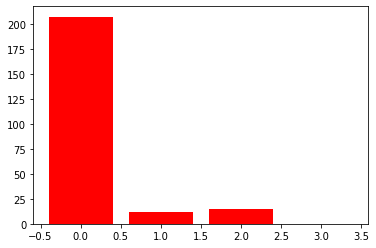

In [14]:
categories = customer_df.groupby("risk_rank").size().index
            
risk_rank_df = customer_df[["risk_rank", "sar_flag"]]

rrs_df = risk_rank_df.loc[risk_rank_df["sar_flag"] == 1]
rrs_series = fill_missing_group(rrs_df.groupby("risk_rank").size(), categories)

plt.bar(categories, rrs_series, color="red")
plt.show()

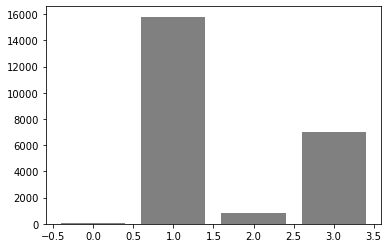

In [15]:
rrns_df = risk_rank_df.loc[risk_rank_df["sar_flag"] == 0]
rrns_series = fill_missing_group(rrns_df.groupby("risk_rank").size(), categories)

plt.bar(categories, rrns_series, color="gray")
plt.show()

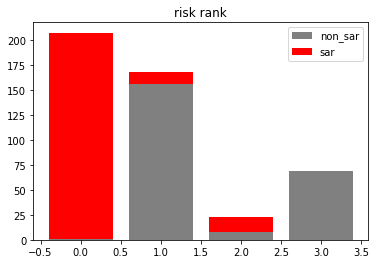

In [16]:
rrns_normalize_series = rrns_series * (len(rrs_df) / len(rrns_df))

plt.title("risk rank")
plt.bar(categories, rrns_normalize_series, color="gray", label="non_sar")
plt.bar(categories, rrs_series, bottom=rrns_normalize_series, color="red", label="sar")
plt.legend()
plt.show()

## Occupation Code

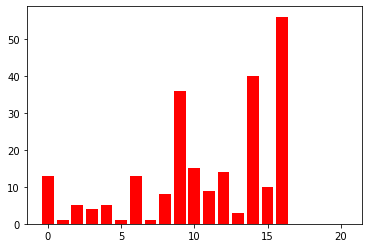

In [17]:
occupation_df = customer_df[["occupation_code", "sar_flag"]]
occ_categories = occupation_df.groupby("occupation_code").size().index

occs_df = occupation_df.loc[occupation_df.loc[:, "sar_flag"] == 1]
occs_series = fill_missing_group(occs_df.groupby("occupation_code").size(), occ_categories)

plt.bar(occ_categories, occs_series, color="red")
plt.show()

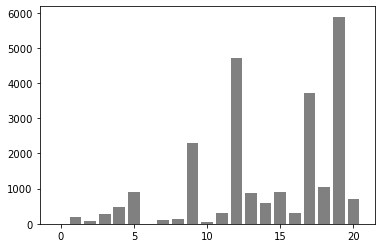

In [18]:
occns_df = occupation_df.loc[occupation_df.loc[:, "sar_flag"] == 0]
occns_series = fill_missing_group(occns_df.groupby("occupation_code").size(), occ_categories)

plt.bar(occ_categories, occns_series, color="grey")
plt.show()

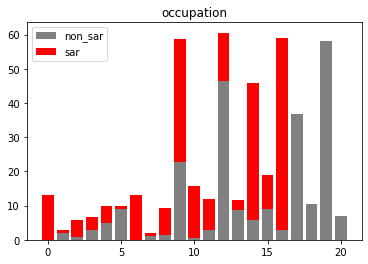

In [19]:
occns_normalize_series = occns_series * (len(occs_df) / len(occns_df))

plt.title("occupation")
plt.bar(occ_categories, occns_normalize_series, color="gray", label="non_sar")
plt.bar(occ_categories, occs_series, bottom=occns_normalize_series, color="red", label="sar")
plt.legend()
plt.show()

## Total Asset 



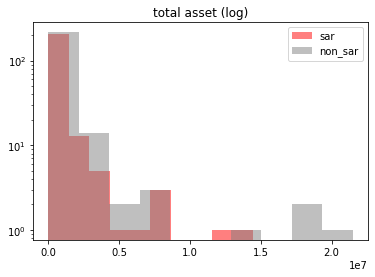

In [20]:
ta_df = customer_df[["total_asset", "sar_flag"]]
tas_df = ta_df.loc[ta_df.loc[:, "sar_flag"] == 1]
tans_df = ta_df.loc[ta_df.loc[:, "sar_flag"] == 0]

tans_df = tans_df.sample(n = 240)

kwargs = dict(alpha=0.5)
plt.title("total asset (log)")
plt.hist(tas_df["total_asset"], **kwargs, color = "red", label="sar", log = True)
plt.hist(tans_df["total_asset"], **kwargs, color = "grey", label="non_sar", log = True)
plt.legend()
plt.show()

## AGE

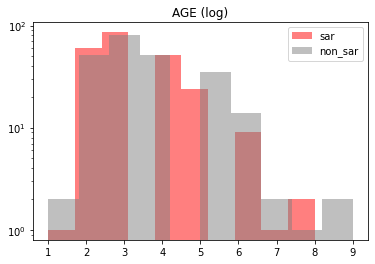

In [21]:
a_df = customer_df[["AGE", "sar_flag"]]
as_df = a_df.loc[a_df.loc[:, "sar_flag"] == 1]
ans_df = a_df.loc[a_df.loc[:, "sar_flag"] == 0]

ans_df = ans_df.sample(n = 240)

kwargs = dict(alpha=0.5)
plt.title("AGE (log)")
plt.hist(as_df["AGE"], **kwargs, color = "red", label="sar", log = True)
plt.hist(ans_df["AGE"], **kwargs, color = "grey", label="non_sar", log = True)
plt.legend()
plt.show()

# BaseLine 

In [22]:
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

dt_df = customer_df.copy()
X = dt_df[["risk_rank", "occupation_code", "total_asset", "AGE"]]
y = dt_df["sar_flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dtc = DecisionTreeClassifier()
model = dtc.fit(X_train, y_train)

y_predict = model.predict(X_test)

print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1 score: ", f1_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()
"""

'\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix \nfrom sklearn.metrics import ConfusionMatrixDisplay\n\ndt_df = customer_df.copy()\nX = dt_df[["risk_rank", "occupation_code", "total_asset", "AGE"]]\ny = dt_df["sar_flag"]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)\n\ndtc = DecisionTreeClassifier()\nmodel = dtc.fit(X_train, y_train)\n\ny_predict = model.predict(X_test)\n\nprint("precision: ", precision_score(y_test, y_predict))\nprint("recall: ", recall_score(y_test, y_predict))\nprint("f1 score: ", f1_score(y_test, y_predict))\n\ncm = confusion_matrix(y_test, y_predict)\ndisplay = ConfusionMatrixDisplay(confusion_matrix = cm)\ndisplay.plot()\n'

## Initial Thoughts
1. Many transactions on the same day seams suspicious



----

# Time Series

In [23]:
y_df = customer_df[['cust_id','sar_flag']].set_index('cust_id')

In [44]:
x_df

NameError: name 'x_df' is not defined

In [43]:
y_df

,sar_flag
cust_id,
a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bfeb016d17b16f37a8d8,0
7e42b5dca9b28ee8e5545beb834361e90e6197d176b389718e6c99b10041c816,0
a6cdf6302aead77112013168c6d546d2df3bcb551956d22c96cf97652e581602,0
1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df4eb21131c33fc247a7,0
67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e213b16abaedf6af700,0
...,...
b600c0720096c241f5aec16b096c6a353492eee8a5855aa7f79d81390811d914,0
06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a9f715aaa74f38d2419,0
0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c24bb3cbd245eaf8aa16,0


In [24]:
##pivot
cdtx_pivot = pd.pivot_table(cdtx_df, values='amt', index=['date'], columns=['cust_id'], aggfunc=np.sum)
cdtx_pivot = cdtx_pivot.fillna(0)
cdtx_pivot = cdtx_pivot[list(set(y_df.index) & set(cdtx_pivot.columns))]
cdtx_pivot

##you may use pd.resample to change frequency

cust_id,301f16a06594a259b57d0e4013c79c7689bc0147b78133dca93c28cb07eb8185,7173a9b109111040372133945e146019457aaf7b3d69ca9cc1e9d3e57754fef4,57e50ec1b2136f3735048af831a92fce90f8b56cdba03db806b2ff53e9cecaaf,de21cdce4100f83c1dce27e79f8f63d121a80cb250f883a8f5ef7cbc056d042a,026935bf1874928f608ed6368fbfdf0585765d05586ee0aed3a158657c8e9703,fd4620b0e018b626a0a5094bec42111466f2039fb8ea36a3090dcdeadc8389b0,2bbc95c774d7ec1ae5b0fe6acc5053e1abf146d3fcd02004c57c59be40c70110,3b55f86a456a00c92ddfd627f630dc83446dc54ba83e048638039ebe19ecd4e4,bf9f09bcdab1148b14bf008488cd1e321cee9ccb97f3383158ab0c6cfa915384,6fe24bafd472c120f074c358293cf39ac90d201eb3ccdc850ba87f1479002d4b,...,41a3c0007e27ed010aa16a7c7c10157bc16232ac70e2d240b73f50bc68576450,0b95d17d96d2f6f51917145555f858fa37a097fb6b9d7188f4aebd20662a2e6f,fe0b3b09a3b8c5435d55a286ecd4fb416e96d3231abdf27c975bf8606a0b559c,1cd97f3337c16bd86b4ef53f997ea89ce1946e38fee6d71e40205b2a1b0cfc88,9b37661198f4653be02634de9583623c8f97ef02061e30fe9ddfadc00e0ed130,9efb72c106f786e5a99a8c2b245864c831cf008dd2e9eea00323f28987c5bdc1,3fe64150dace651457b33192c7dcfaaa92a683b369a338ea98552115aaa95635,947e627e4627599e994598a747dfd11a2a17c1a2d11ada7d4b8c26a79e53b8f1,0bfca91c0e480cf994e6076218a7d8d871ba63c9a12d7ade1020271781f016ad,b086ec952e5054ff617185a6474080c7826e5437f22b2daabd908f57c82711a7
date,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,1327.0,0.0,9232.0,0.0,259.0,0.0,...,0.0,0.0,1198.0,0.0,678.0,0.0,27782.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,3603.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,542.0,0.0,0.0,0.0,727.0,208.0,0.0,0.0
2,0.0,0.0,0.0,1253.0,3087.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.0,0.0,0.0,0.0,0.0,1253.0,0.0,0.0
3,1205.0,0.0,939.0,0.0,0.0,0.0,0.0,0.0,378.0,0.0,...,625.0,8158.0,305.0,0.0,0.0,0.0,1225.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,885.0,0.0,612.0,0.0,0.0,0.0,...,0.0,0.0,1121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,0.0,0.0,0.0,4793.0,0.0,0.0,0.0,0.0,0.0,...,419.0,0.0,2106.0,0.0,0.0,0.0,0.0,0.0,1014.0,628.0
391,0.0,2798.0,0.0,0.0,19922.0,0.0,540.0,0.0,7329.0,0.0,...,3863.0,0.0,4466.0,0.0,1744.0,0.0,0.0,0.0,0.0,594.0
392,0.0,0.0,0.0,1502.0,6595.0,0.0,16.0,0.0,1496.0,0.0,...,20831.0,8222.0,4355.0,598.0,3852.0,0.0,0.0,0.0,0.0,0.0


In [25]:
##pivot
dp_pivot = pd.pivot_table(dp_df, values='tx_amt', index=['tx_date'], columns=['cust_id'], aggfunc=np.sum)
dp_pivot = dp_pivot.fillna(0)
dp_pivot = dp_pivot[list(set(y_df.index) & set(dp_pivot.columns))]
dp_pivot

##you may use pd.resample to change frequency

cust_id,2e4677bf51c05d8581d893bb5016f3dd3997e08bbe1a773dcddebb2ec3d57c67,668b176368323712131565e26418bb1455de469a5d368d657fcd4ca91310ed83,de21cdce4100f83c1dce27e79f8f63d121a80cb250f883a8f5ef7cbc056d042a,3f0eeade1bfeeda7d4289561870851743880a4fa3695edd13af773fb409cf9f8,3b55f86a456a00c92ddfd627f630dc83446dc54ba83e048638039ebe19ecd4e4,bf9f09bcdab1148b14bf008488cd1e321cee9ccb97f3383158ab0c6cfa915384,e118d964b4a14280594bf25575ee237a262295c50faca135199bffe8646674de,f1aa089fbe971e83d7587d190e38888459a6e950bc0c44816200407a79bec3c2,56374af3f97262e1f3be64d77d33422ed084e567ad7e2e79b4b0b744beff8048,1dfa1bb03c80d139b003c451b08c2c9b1a3254b2fd30abdfad6caf961307047b,...,044b3822e983e2ef58bf4d8a4f9d834462ded48c8f4797c8c9078201b1e62641,0723721ed554babf414458760d1eecbf61fb23bf7dbcf9956d29c3643e244235,d276575ac2da8d7db184d3d96cd13f27ac44689df6b3e8c8e6604c1dd0665013,2d7a4c7af8d5b89c00cab8da759c9ee89e1f3c0c861a3d5199f5029b988c5509,9b37661198f4653be02634de9583623c8f97ef02061e30fe9ddfadc00e0ed130,b92c6c80aed3640d45224aca4cb96949b785153f7ed6880e3f02e07980b2fc40,8771a7bc6c3d5017935e61414897c90f9a92698cc2d0774680c85f70a5783cfb,3fe64150dace651457b33192c7dcfaaa92a683b369a338ea98552115aaa95635,8509aac39ebe1602af4dd82f35c9d89b3414949a9817584a42edb66644a3aacf,a8ba75aaeda24b04b815316918710af66eef9b6b6c67aabb62b83d42b1e603c2
tx_date,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,701.0,0.0,10070.0,3430261.0,0.0,0.0,...,1669.0,0.0,0.0,1030.0,0.0,5692629.0,0.0,100084.0,0.0,32029.0
1,0.0,0.0,0.0,0.0,33163.0,572964.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2389871.0,0.0,0.0,0.0,179159.0
2,0.0,0.0,0.0,1815.0,7553.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2168463.0,0.0,0.0,0.0,26124.0
3,5194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,888.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2496866.0,0.0,0.0,0.0,107296.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2575907.0,0.0,509.0,0.0,25328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,236934.0,0.0,0.0,0.0,0.0,272876.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104539.0,112938.0,500.0
391,321913.0,0.0,0.0,0.0,0.0,0.0,23634.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,82398.0,0.0,0.0,0.0,0.0,3003.0
392,501748.0,0.0,0.0,0.0,0.0,2390.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1268.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#pivot_dic = pivot.to_dict()
X_ts = dp_pivot.T.to_numpy()
y_ts = np.array([y_df.loc[i,'sar_flag'].max() for i in dp_pivot.columns])

C:\Users\ASUS\AppData\Local\Temp/ipykernel_25268/1140045340.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 2))


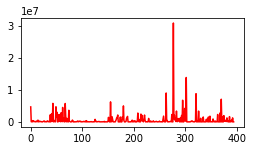

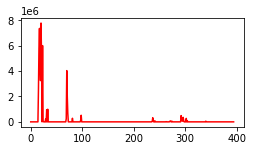

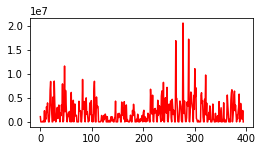

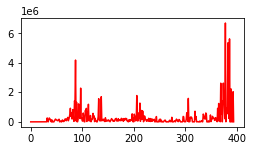

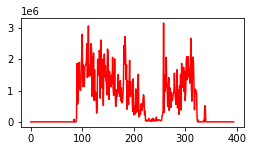

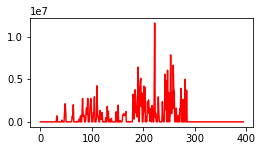

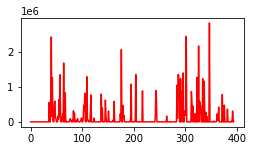

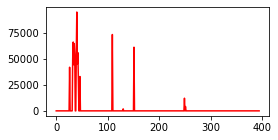

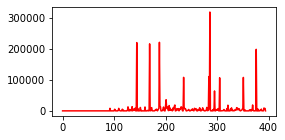

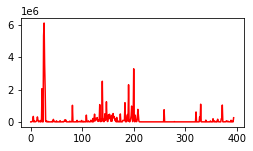

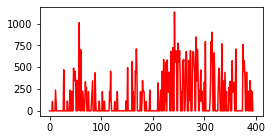

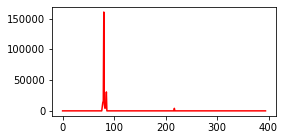

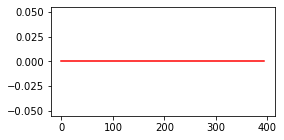

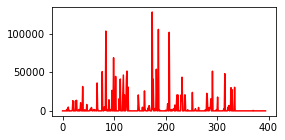

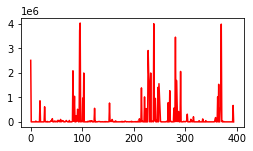

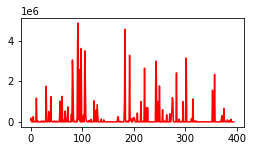

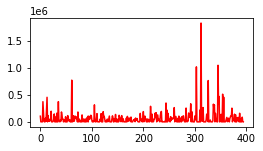

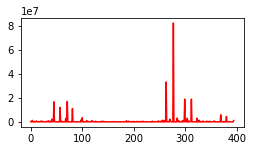

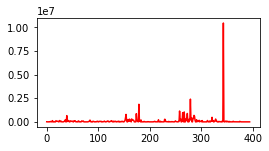

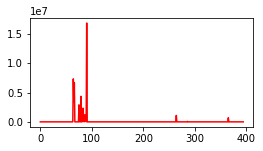

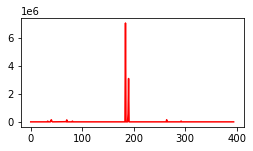

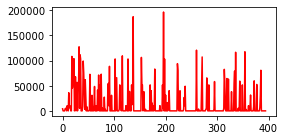

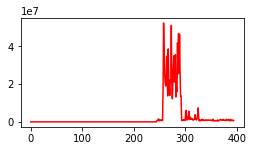

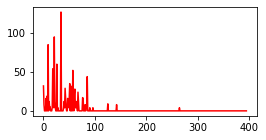

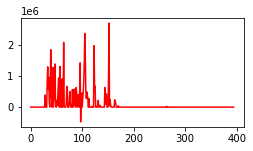

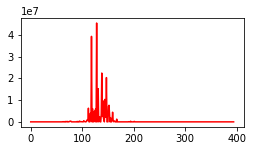

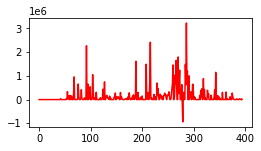

In [27]:
#abnormal
color_label = ['grey','red']
for i in range(500):
      if y_ts[i]==1:
        plt.figure(figsize=(4, 2))
        plt.plot(X_ts[i], color=color_label[y_ts[i]])

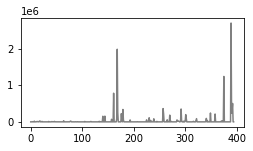

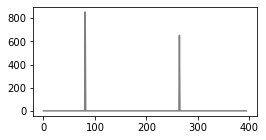

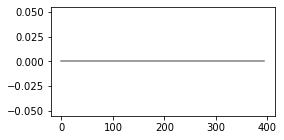

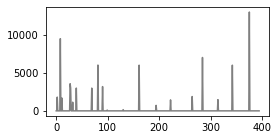

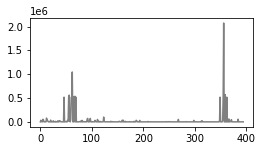

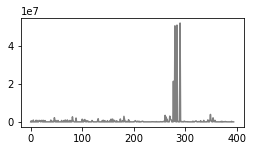

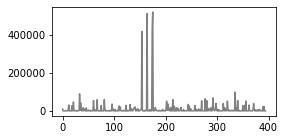

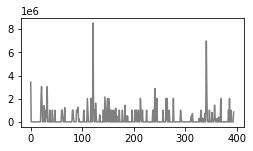

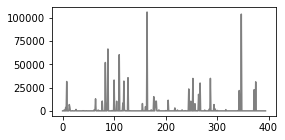

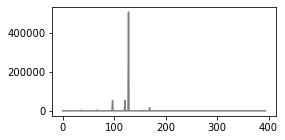

In [28]:
#normal
color_label = ['grey','red']
for i in range(10):
      if y_ts[i]==0:
        plt.figure(figsize=(4, 2))
        plt.plot(X_ts[i], color=color_label[y_ts[i]])

In [30]:
X_ts[0]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 5.194000e+03,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.937700e+04,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.716000e+03,
       8.237000e+03, 8.376000e+03, 2.017000e+03, 4.690000e+03,
       0.000000e+00, 2.108900e+04, 2.453300e+04, 0.000000e+00,
       0.000000e+00, 4.035000e+03, 1.159900e+04, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.004000e+04,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       2.070000e+02, 7.416000e+03, 2.285000e+03, 0.000000e+00,
       3.041000e+03, 1.758000e+03, 1.167800e+04, 3.687000e+03,
       8.140000e+02, 1.070000e+03, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 9.350000e+02, 0.000000e+00, 1.140000e+02,
       0.000000e+00, 3.610000e+02, 0.000000e+00, 0.000000e+00,
       1.460000e+02, 0.000000e+00, 0.000000e+00, 5.5500

### ACF&PACF

In [31]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
acf(X_ts[0])[0:13]

array([ 1.        ,  0.09151765,  0.04586467,  0.07779566, -0.0179531 ,
       -0.02114187, -0.01265523,  0.09599652,  0.0320738 , -0.00143407,
       -0.00984225,  0.03877788, -0.00573301])

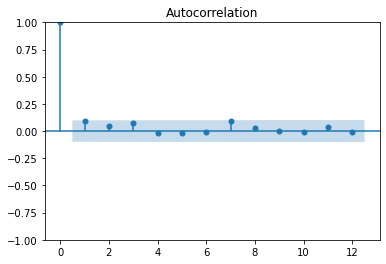

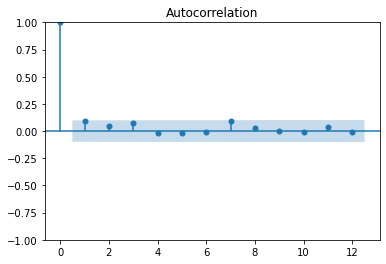

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(X_ts[0], lags= 12, alpha=0.05)

In [107]:
x = customer_df[['alert_key', 'risk_rank', 'occupation_code', 'total_asset', 'AGE']].copy()
y = customer_df[['alert_key', 'sar_flag']].copy()
x= x.set_index('alert_key')
y= y.set_index('alert_key')
x = x.fillna(0)

In [111]:
predict_ans = pd.read_csv("./預測的案件名單及提交檔案範例.csv")

In [126]:
x

,risk_rank,occupation_code,total_asset,AGE
alert_key,,,,
171142,3,12.0,241719.0,3
171152,3,13.0,599497.0,6
171177,1,19.0,51160.0,4
171178,3,9.0,3634343.0,6
171180,1,17.0,4076287.0,4
...,...,...,...,...
352123,1,17.0,12207.0,2
352124,1,17.0,259985.0,4
352125,3,19.0,928963.0,3


In [127]:
y

,sar_flag
alert_key,
171142,0
171152,0
171177,0
171178,0
171180,0
...,...
352123,0
352124,0
352125,0


In [113]:
predict_ans = predict_ans.drop(['probability'], axis=1)

In [114]:
predict_ans

,alert_key
0,357307
1,376329
2,373644
3,357668
4,354443
...,...
3845,364485
3846,363155
3847,368710
3848,358067


In [ ]:
from sklearn import linear_model
y = np.array(y).astype('float64')
X = sm.add_constant(x)
clf = linear_model.Ridge(alpha=0.01)
clf.fit(X, y)

In [117]:
##1. Random Forest
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_X, train_y)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_25268/3702770704.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_fit = forest.fit(train_X, train_y)


In [118]:
test_y_predicted = forest.predict(test_X)

In [125]:
test_y_predicted[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [110]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_predicted)
auc = metrics.auc(fpr, tpr)
print(auc)

0.5052120607519536


In [42]:
X_ts

array([[     0.,      0.,      0., ..., 501748.,    506.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       ...,
       [100084.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [ 32029., 179159.,  26124., ...,      0.,  28026.,  13883.]])